In [4254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 

In [5104]:
data = pd.read_csv('Data_Holland/mwl1687_R.csv')
data = pd.DataFrame(data)
#data=pd.concat([data,data,data,data,data,data,data,data,data,data,data,data,data])
print(data.shape)
data.head()

(986, 14)


,Pmin,Pmax,Pavg,Pref,Pcmin,Pcavg,Pcmax,Amin,Aavg,Amax,Ramin,Ramax,Ravg,Rain
0,-55,-53,-54.0,-54.5,-55.0,-54.75,-54.5,0.0,0.25,0.5,4.0,3.5,3.75,0.13
1,-55,-53,-54.0,-54.5,-55.0,-54.75,-54.5,0.0,0.25,0.5,4.0,3.5,3.75,0.03
2,-55,-54,-54.5,-54.5,-55.0,-54.75,-54.5,0.0,0.25,0.5,4.0,3.5,3.75,0.19
3,-56,-54,-55.0,-54.5,-56.0,-55.25,-54.5,0.0,0.75,1.5,5.0,3.5,4.25,0.14
4,-56,-54,-55.0,-54.5,-56.0,-55.25,-54.5,0.0,0.75,1.5,5.0,3.5,4.25,0.14


Text(0, 0.5, 'Rain rate')

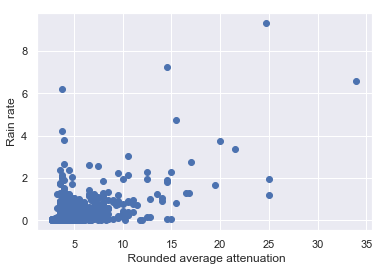

In [5105]:
xpts=np.array(data['Ramin'])
ypts=np.array(data['Ravg'])
zpts=np.array(data['Ramax'])

apts=np.array(data['Pmin'])
bpts=np.array(data['Pavg'])
cpts=np.array(data['Pmax'])

X=np.vstack((xpts,ypts,zpts,apts,bpts,cpts))
X=X.T

y=np.array(data['Rain'])
y=np.vstack((y))
X.shape

plt.scatter(data['Ravg'],data['Rain'])
plt.xlabel(' Rounded average attenuation')
plt.ylabel('Rain rate')
#plt.savefig('cloud23.eps')

In [5106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [5107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [5108]:
X_train.shape

(788, 6)

In [5109]:
reg= LinearRegression()

In [5110]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5111]:
reg.coef_

array([[-3.98722901e+11,  4.55739086e+11, -9.00560397e+10,
        -1.37298992e+12,  1.59700784e+12, -3.92857522e+11]])

In [5112]:
reg.intercept_

array([0.34835514])

In [5113]:
XR=reg.predict(X_train)
print(XR.shape)
yhat=reg.predict(X_train)

(788, 1)


Text(0, 0.5, 'Predictions (rain rate)')

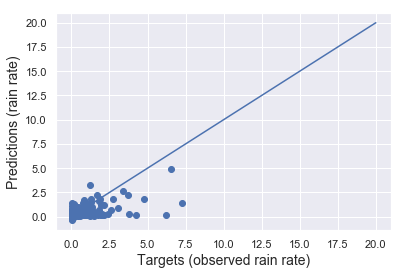

In [5114]:
fig=plt.scatter(y_train,yhat)
ab=ordo=range(0,21)
fig=plt.plot(ab,ordo)
plt.xlabel('Targets (observed rain rate)',size=14)
plt.ylabel('Predictions (rain rate)',size=14)
#plt.savefig('train23.eps')

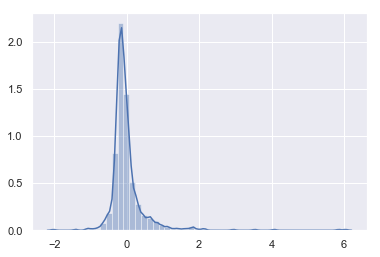

In [5115]:
sns.distplot(y_train-yhat)
#y_train.shape, yhat.shape
plt.savefig('residuals526A.eps')

In [5116]:
r2 = reg.score(X_train,y_train)
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
r2, adjusted_r2

(0.2926043858307579, 0.28716984846198)

In [5117]:
X_train[0]

array([ 0.36956485,  0.53768014,  1.08474554, -0.37086478, -0.62177153,
       -1.23143986])

In [5123]:
yhat_test=reg.predict(X_test)
#yhat_test=reg.predict(X)
print(X_test.shape)
MSE = mean_squared_error(y_test , yhat_test)
MAE = mean_absolute_error(y_test , yhat_test)
print('MAE = ',MAE)
print('MSE = ',MSE)

(198, 6)
MAE =  0.3176250367985379
MSE =  0.4249174305279448


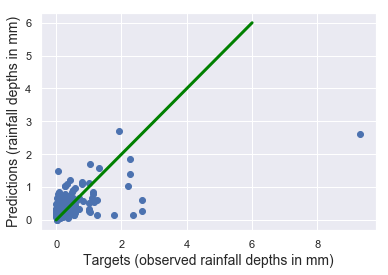

In [5142]:
plt.scatter(y_test,yhat_test)
#plt.plot(y_test,yhat_test)
ab=ordo=range(0,7)
fig=plt.plot(ab,ordo,lw=3,c='green')
plt.xlabel('Targets (observed rainfall depths in mm)',size=14)
plt.ylabel('Predictions (rainfall depths in mm)',size=14)
plt.savefig('LR1687A.eps')

In [5127]:
ypts=np.reshape(ypts,(-1,1))

In [5128]:
np.corrcoef(y_test.T,yhat_test.T)

array([[1.        , 0.60008138],
       [0.60008138, 1.        ]])

In [5129]:
np.corrcoef(y.T,ypts.T)

array([[1.        , 0.55285225],
       [0.55285225, 1.        ]])

In [5130]:
print(np.mean(y_test))
print(np.mean(yhat_test))

0.3785858585858586
0.39709960645671655


In [5133]:
np.sum(yhat_test<0)

1

In [5134]:
for i in range(yhat_test.shape[0]):
    if (yhat_test[i]<0):
        yhat_test[i]=0

In [5135]:
np.sum(yhat_test<0)

0

In [5136]:
np.corrcoef(y_test.T,yhat_test.T)

array([[1.        , 0.60013413],
       [0.60013413, 1.        ]])

In [5137]:
print(np.mean(y_test))
print(np.mean(yhat_test))

0.3785858585858586
0.3972045836785827


In [5138]:
MSE = mean_squared_error(y_test , yhat_test)
MAE = mean_absolute_error(y_test , yhat_test)
print('MAE = ',MAE)
print('MSE = ',MSE)

MAE =  0.3175200595766716
MSE =  0.4249089498916449


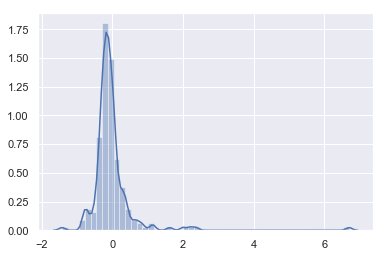

In [5139]:
sns.distplot(y_test-yhat_test)

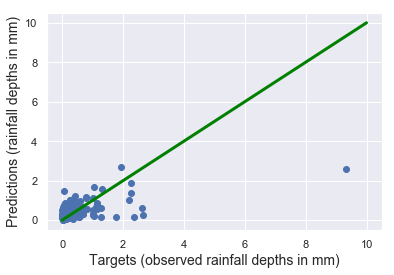

In [5144]:
plt.scatter(y_test,yhat_test)
#plt.plot(y_test,yhat_test)
ab=ordo=range(0,11)
fig=plt.plot(ab,ordo,lw=3,c='green')
plt.xlabel('Targets (observed rainfall depths in mm)',size=14)
plt.ylabel('Predictions (rainfall depths in mm)',size=14)
plt.savefig('LR1687.eps')